<a href="https://colab.research.google.com/github/gautam200/demo/blob/main/Tesla_Stock_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [ ]:
tesla_stocks = pd.read_csv('tesla_stocks (1).csv')

In [ ]:
tesla_stocks.head()

,Date,Open,High,Low,Close,Volume
0,2-Aug-17,318.94,327.12,311.22,325.89,13091462
1,1-Aug-17,323.00,324.45,316.13,319.57,8303102
2,31-Jul-17,335.50,341.49,321.04,323.47,8535136
3,28-Jul-17,336.89,339.60,332.51,335.07,4880414
4,27-Jul-17,346.00,347.50,326.29,334.46,8302405


In [ ]:
tesla_stocks.isna().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [ ]:
tesla_stocks["Volume"].min()

710277

In [ ]:
tesla_stocks.std()

<ipython-input-6-38e54e6a1734>:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  tesla_stocks.std()


Open      4.184781e+01
High      4.198977e+01
Low       4.124841e+01
Close     4.171917e+01
Volume    2.753492e+06
dtype: float64

In [ ]:
tesla_stocks.count()

Date      756
Open      756
High      756
Low       756
Close     756
Volume    756
dtype: int64

In [ ]:
data_to_use = tesla_stocks['Close'].values

In [ ]:
print('Total number of days in the dataset: {}'.format(len(data_to_use)))

Total number of days in the dataset: 756


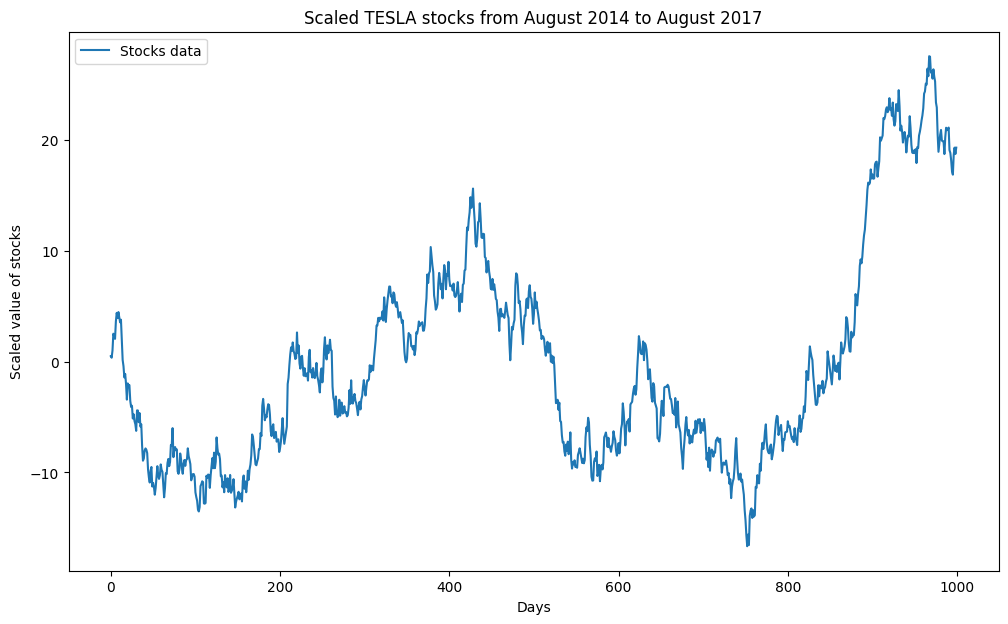

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# standard scaler
np.random.seed(42)
scaled_dataset = np.random.normal(loc=0, scale=1, size=1000).cumsum()

plt.figure(figsize=(12, 7), frameon=False, facecolor='brown', edgecolor='blue')
plt.title('Scaled TESLA stocks from August 2014 to August 2017')
plt.xlabel('Days')
plt.ylabel('Scaled value of stocks')
plt.plot(scaled_dataset, label='Stocks data')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('tesla_stocks (1).csv')

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Date-related features
df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year
df['weekday'] = df['Date'].dt.weekday  # Monday is 0 and Sunday is 6

# Lag features
df['previous_close'] = df['Close'].shift(1)
df['price_change'] = df['Close'].pct_change() * 100

# Rolling statistics
window_size = 5
df['rolling_mean'] = df['Close'].rolling(window=window_size).mean()
df['rolling_std'] = df['Close'].rolling(window=window_size).std()

# Volume-related features
df['volume_average'] = df['Volume'].rolling(window=window_size).mean()
df['volume_ratio'] = df['Volume'] / df['volume_average']

# Relative Strength Index (RSI)
window_length = 14
delta = df['Close'].diff(1)
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)

average_gain = gain.rolling(window=window_length).mean()
average_loss = loss.rolling(window=window_length).mean()

rs = average_gain / average_loss
df['rsi'] = 100 - (100 / (1 + rs))

# Display the modified DataFrame
print(df)


          Date    Open    High     Low   Close    Volume  day  month  year  \
0   2017-08-02  318.94  327.12  311.22  325.89  13091462    2      8  2017   
1   2017-08-01  323.00  324.45  316.13  319.57   8303102    1      8  2017   
2   2017-07-31  335.50  341.49  321.04  323.47   8535136   31      7  2017   
3   2017-07-28  336.89  339.60  332.51  335.07   4880414   28      7  2017   
4   2017-07-27  346.00  347.50  326.29  334.46   8302405   27      7  2017   
..         ...     ...     ...     ...     ...       ...  ...    ...   ...   
751 2014-08-08  251.16  251.76  246.50  248.13   5099061    8      8  2014   
752 2014-08-07  250.12  256.69  249.12  252.39   7478926    7      8  2014   
753 2014-08-06  238.90  251.42  238.58  248.93   9249265    6      8  2014   
754 2014-08-05  237.47  242.99  235.69  238.49   5388581    5      8  2014   
755 2014-08-04  234.38  240.50  233.27  238.52   5967406    4      8  2014   

     weekday  previous_close  price_change  rolling_mean  rolli

Mean Squared Error: 1.5250921676026028


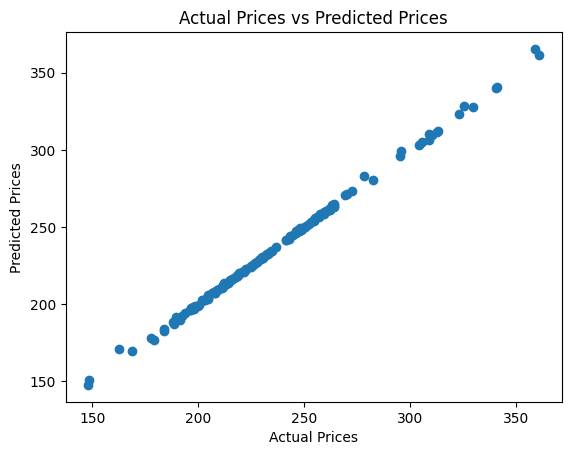

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt



# Assuming df is the DataFrame with the features and target variable (e.g., 'Close')
features = ['day', 'month', 'year', 'weekday', 'previous_close', 'price_change', 'rolling_mean', 'rolling_std', 'volume_ratio', 'rsi']
target = 'Close'

# Drop missing values (NaN) that might be introduced due to feature engineering
df = df.dropna()

# Split the data into features (X) and target variable (y)
X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose a machine learning algorithm (e.g., Linear Regression)
model = make_pipeline( LinearRegression())

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Plotting predictions vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()


Mean Squared Error (Random Forest): 12.969976224228256


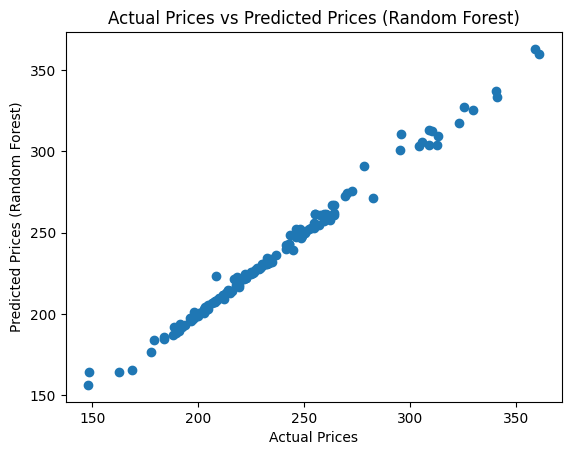

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Assuming df is the DataFrame with the features and target variable (e.g., 'Close')
features = ['day', 'month', 'year', 'weekday', 'previous_close', 'price_change', 'rolling_mean', 'rolling_std', 'volume_ratio', 'rsi']
target = 'Close'

# Drop missing values (NaN) that might be introduced due to feature engineering
df = df.dropna()

# Split the data into features (X) and target variable (y)
X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose Random Forest Regressor as the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'Mean Squared Error (Random Forest): {mse_rf}')

# Plotting predictions vs actual values for Random Forest
plt.scatter(y_test, y_pred_rf)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices (Random Forest)')
plt.title('Actual Prices vs Predicted Prices (Random Forest)')
plt.show()


In [ ]:
print("Linear Regression Metrics:")
print(f'Mean Squared Error (MSE): {mse}')
print("Random Forest Metrics:")
print(f'Mean Squared Error (MSE): {mse_rf}')

Linear Regression Metrics:
Mean Squared Error (MSE): 1.5250921676026243
Random Forest Metrics:
Mean Squared Error (MSE): 12.969976224228256


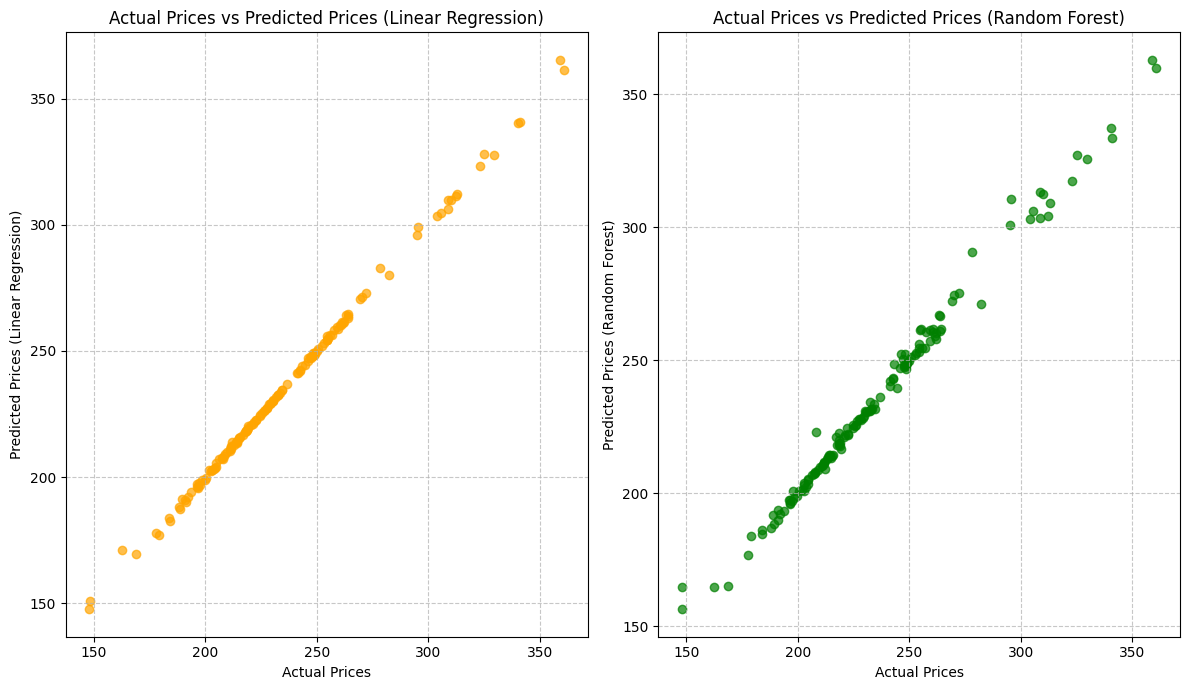

In [ ]:
import matplotlib.pyplot as plt

# Plotting predictions vs actual values for Linear Regression
plt.figure(figsize=(12, 7), frameon=False, facecolor='brown', edgecolor='blue')
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, color='orange', alpha=0.7)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices (Linear Regression)')
plt.title('Actual Prices vs Predicted Prices (Linear Regression)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Plotting predictions vs actual values for Random Forest
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf, color='green', alpha=0.7)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices (Random Forest)')
plt.title('Actual Prices vs Predicted Prices (Random Forest)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Evaluate Linear Regression model
mse_lr = mean_squared_error(y_test, y_pred)
rmse_lr = mean_squared_error(y_test, y_pred, squared=False)
mae_lr = mean_absolute_error(y_test, y_pred)

# Evaluate Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

# Print the evaluation metrics
print("Linear Regression Metrics:")
print(f'Mean Squared Error (MSE): {mse_lr}')
print(f'Root Mean Squared Error (RMSE): {rmse_lr}')
print(f'Mean Absolute Error (MAE): {mae_lr}')
print()

print("Random Forest Metrics:")
print(f'Mean Squared Error (MSE): {mse_rf}')
print(f'Root Mean Squared Error (RMSE): {rmse_rf}')
print(f'Mean Absolute Error (MAE): {mae_rf}')


Linear Regression Metrics:
Mean Squared Error (MSE): 1.5250921676026243
Root Mean Squared Error (RMSE): 1.2349462205305235
Mean Absolute Error (MAE): 0.6383654955276522

Random Forest Metrics:
Mean Squared Error (MSE): 12.969976224228256
Root Mean Squared Error (RMSE): 3.601385320155045
Mean Absolute Error (MAE): 2.1414463087248348


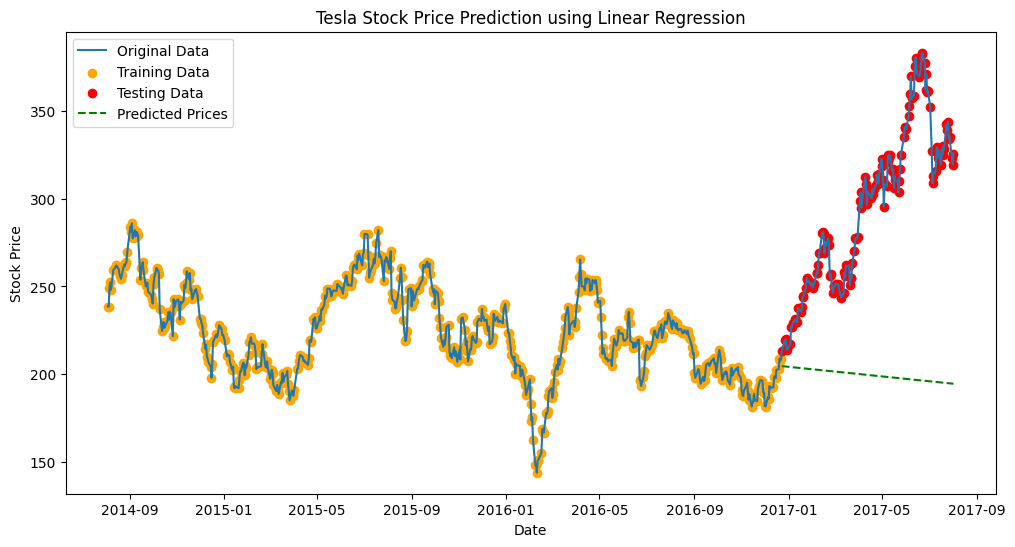

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('tesla_stocks (1).csv')

# Consider only the 'Date' and 'Close' columns
data = data[['Date', 'Close']]

# Convert the 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Sort the dataframe by date
data = data.sort_values(by='Date')

# Feature engineering: create a new column for the number of days since the start
data['Days'] = (data['Date'] - data['Date'].min()).dt.days

# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)

# Prepare the features (X) and target variable (y)
X_train = train_data[['Days']]
y_train = train_data['Close']
X_test = test_data[['Days']]
y_test = test_data['Close']

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Plot the original, training, and testing data
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Original Data')
plt.scatter(train_data['Date'], train_data['Close'], label='Training Data', color='orange')
plt.scatter(test_data['Date'], test_data['Close'], label='Testing Data', color='red')
plt.plot(test_data['Date'], predictions, label='Predicted Prices', linestyle='dashed', color='green')
plt.title('Tesla Stock Price Prediction using Linear Regression')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
